# Multilingual Embeddings

This notebook provides basic functionality for studying embedding across languages. Based on a corpus of medical ads we aim to explor cross-lingual connection using different types of visualisations
- a scatter plot of embedding using dimensionality reduction (UMAP)
- a heatmap that compares all the embeddings and highlight similar items

**Important**

The first part of this notebook shows how to retrieve and prepare data for analysis ("Data preparation"). However, you can skip this part and go directly to "Cross-lingual search" and the following section, where you can download the processed data.

## Install the Impresso library

In [ ]:
!pip install -qqq git+https://github.com/impresso/impresso-py.git@embeddings-search

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.33.0 which is incompatible.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.33.0 which is incompatible.
google-genai 1.46.0 requires httpx<

In [ ]:
# restart the kernel just in case...
import os
os.kill(os.getpid(), 9)

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
# helper functions for embedding text and retrieving vectors
import time
import base64
import struct

def embed_text(text: str, target: str):
  """
  Convert text to embedding, return None in case of an error
  """
  time.sleep(.1)
  try:
    return impresso_session.tools.embed_text(text, target)
  except Exception as e:
    print(text)
    print(e)
    print('Error 1')
    return None


def convert_embedding(embedding: np.float32):
  """
  Convert base64 string to a float array
  """
  if not embedding:
    return None

  _, arr = embedding.split(':')
  arr = base64.b64decode(arr)
  outof_corpus_emb = [struct.unpack('f', arr[i:i+4])[0] for i in range(0, len(arr), 4)]
  return outof_corpus_emb

# get the article embeddings from the API

def get_embedding_by_uid(uid):
  time.sleep(.1)
  try:
    return impresso_session.content_items.get_embeddings(uid)[0]
  except Exception as e:
    print('Error 2')
    return None


def get_embedding_from_api(row ,text_col, target='text'):
  """first check if embedding already exists
  other create embedding
  """
  embedding = get_embedding_by_uid(row['uid'])
  if not embedding:
    embedding = embed_text(row[text_col], target)
  return convert_embedding(embedding)


## Connect to the Impresso client

In [ ]:
from impresso import connect

impresso_session = connect('https://dev.impresso-project.ch/public-api/v1')

🎉 You are now connected to the Impresso API!  🎉
🔗 Using API: https://dev.impresso-project.ch/public-api/v1


# Data Preparation

Below we provide a link to the processed data, so feel free skip to this part.

## Download and unzip data

In [ ]:
!gdown 1qUyd9iKdl7eX3Kg0H8lbhbtXPudA3gGD

Downloading...
From (original): https://drive.google.com/uc?id=1qUyd9iKdl7eX3Kg0H8lbhbtXPudA3gGD
From (redirected): https://drive.google.com/uc?id=1qUyd9iKdl7eX3Kg0H8lbhbtXPudA3gGD&confirm=t&uuid=f68953b0-b035-40bd-8e40-213f9e7da200
To: /content/impresso_WS4data.zip
100% 115M/115M [00:01<00:00, 59.0MB/s]


In [ ]:
# unzip the data for the general query
!unzip -o impresso_WS4data.zip -d data

Archive:  impresso_WS4data.zip
   creating: data/impresso_WS4data/
  inflating: data/impresso_WS4data/barista_medicamentPlantes.csv  
  inflating: data/__MACOSX/impresso_WS4data/._barista_medicamentPlantes.csv  
  inflating: data/impresso_WS4data/webapp_malariaPaludismeOR.csv  
  inflating: data/__MACOSX/impresso_WS4data/._webapp_malariaPaludismeOR.csv  
  inflating: data/impresso_WS4data/barista_colonialMedicine.csv  
  inflating: data/__MACOSX/impresso_WS4data/._barista_colonialMedicine.csv  
  inflating: data/impresso_WS4data/webapp_medicineAds.csv  
  inflating: data/__MACOSX/impresso_WS4data/._webapp_medicineAds.csv  
  inflating: data/impresso_WS4data/barista_medicalProductsOR.csv  
  inflating: data/__MACOSX/impresso_WS4data/._barista_medicalProductsOR.csv  
  inflating: data/impresso_WS4data/gallica_vietnamesePharmacistcatalogue_bpt6k42289094.pdf  
  inflating: data/__MACOSX/impresso_WS4data/._gallica_vietnamesePharmacistcatalogue_bpt6k42289094.pdf  


In [ ]:
CSV_PATH = '/content/data/impresso_WS4data/webapp_malariaPaludismeOR.csv'
df = pd.read_csv(CSV_PATH, sep=';',skiprows=4)
df.head(3)

,uid,access_right,collections,countryCode,dataProviderCode,excerpt,isOnFrontPage,is_content_available,is_olr,issue,...,provinceCode,publicationDate,relevance,title,topics,totalPages,transcript,transcriptLength,type,year
0,ACI-1832-01-01-a-i0001,NaN,NaN,CH,BCUL,"LAUSANNE AU BAZ AR VAUDOIS, AU CHEMIN-NEUF, N°...",True,NaN,True,ACI-1832-01-01-a,...,na,1832-01-01T00:00:00Z,1.0,NaN,NaN,1,"LAUSANNE AU BAZ AR VAUDOIS, AU CHEMIN-NEUF, N°...",50,page,1832
1,ACI-1832-01-01-a-i0003,NaN,NaN,CH,BCUL,Jf a^x- ~ Kr /Wze>#,False,NaN,True,ACI-1832-01-01-a,...,na,1832-01-01T00:00:00Z,1.0,NaN,NaN,1,Jf a^x- ~ Kr /Wze>#,5,page,1832
2,ACI-1832-01-01-a-i0004,NaN,NaN,CH,BCUL,"G. A. Bridel, à Lausanne /& #rt-H \?vfi ©",False,NaN,True,ACI-1832-01-01-a,...,na,1832-01-01T00:00:00Z,1.0,NaN,NaN,1,"G. A. Bridel, à Lausanne /& #rt-H \?vfi ©",9,page,1832


In [ ]:
df.shape

(10000, 29)

Let's inspect the distribution of the language codes.

In [ ]:
df.languageCode.value_counts()

,count
languageCode,
de,8405
fr,1595


And now, we sample a subset of evenly divided over both languages in our dataset.

In [ ]:
df_sample = pd.concat([df[df.languageCode=='de'].sample(500,random_state=42),
                       df[df.languageCode=='fr'].sample(500,random_state=42)],
                      ignore_index=True)

In [ ]:
df_sample.shape

(1000, 29)

# Cross-lingual search with the Impresso API

The example below demonstrates the Impresso API for searching items across languages. We use an embedded German text to query the the vector space of French items.

In [ ]:
# define query and target language
query_lang = 'de'
target_lang = 'fr'

In [ ]:
# get the uid of an article
row = df[df.languageCode==query_lang].sample(1)#['uid'].values[0]
text = str(row.transcript.values[0])
text

'Vermischtes Ein komlfches Intermezzo trat im deutfchen Reichstag trotz dem Ernst der Situation ein, als Graf Moltke bei der Abstimmung irrthümlich für bie dreijährige Bewilligung stimmte. Als ein Kollega ihn beim Frack zupfte unb auf den Irrthum aufmerksam machte, rief er mit lauter Stimme unb erhobenen Armen Nein! Nein! und stimmte dann selbst in die allgemeine Heiterkeit ein. — In einer öden Gegend in Irland liegen die Winnschen Güter, welche Londoner Geldwucherern in die Hände gefallen stnd, nachdem der Besitzer leine Pachtzinfen hatte erhalten lönnen. Seit ben letzten 5 Jahren waren alle möglichen Maßregeln gegen die Pächter ergriffen worden, um sie zur Zahlung zu zwingen. Das Kreisgericht von Kerry hatte vergeblich versucht, eine Verständigung zu erzielen; der Besitzer wollte nichts davon wissen. Kürzlich gingen bei seinem Agenten 70 Ausweisungsbefehle ein und hierauf begann derfelbe die Exekutionen in einer Weife, welche jeder Menfchlichkeit fpottet. Er fetzte die Häuser der Päc

In [ ]:
# retrieve embedding for text
embedding = embed_text(text, 'text')
print(embedding)

gte-768:JcW0vf6n+D0/nHO9c0a5PdyOQ72fZAa+UKCVveLjsz1HcKk8un2UvUQxp70i75s9tKuUvMJhgTwtLUG9pwvmPXJCxzwZhTA7XEaCPSP6Iz2oS8Q9uR6APfKKuTxqPQY95u4xvZXsAD0q/Sw8B5KNvXDfAbzIqbI8rz06vKbtKb1KXba8Q5vNPNd4pj12MxG9Yi6hPPOvrjy73ea8jCy8u2bkbz10OlS9MykMPeGjFLyqmR2993+PvAaBM73naEo9cM6KvHPHMD16bkE5ZCUHPfc2tjymTFg8UFuZuUKyATzfOfK926LivBxpiT0mVlm9gS5RvKfiz7oLYWS9pMMvPRjxiL1tiL88JglqPMbXDb14Sw4+p0LtPGsuPL3msFI940N+PKStAj2BOTE9298ePQBtbDsFKAs7p04jPR4SQj1EqjS8VViCPMp2Gz0Bps48048BvVTJXL0oc2y95jOfuTzzMLtI+1u8IXyFO1x1hLwYdQq94c4jvQuMIT04BEU9wmMNvTco9zs4CVM9ciZKPeHiFD2emfU71DUgPS6Gkrsi+n26M1c0vH+IrjvoiQ299qm5vN337Dw/qDm9YERtvXDf7bxnCvu872XVu5ltPj1tnBk9d+AEPOgLCD2e8wQ81oGZus5dDr1m1FS993sTuxyPAL7lyEA9hlKfvGzXHLxwnJA8dRQPPViSkLtJjZg8crftO+OiPb2aq8O7wu0SvSL6JLyp9FY9PJZ+PNdZqDzZVV+9iXHnPERrqb2+mLC7g19evcin1jrY2kq8qz4vvUDNYD1a70g9Sx1nPFILijyVvuY8L7FGvQg6FzxP8207EjG3uxvxMT2kLAC9ZCP3u9qZqD1yfyM9gW/Ou0eGhb3SVkO9GWMYvWVTB7wTkKQ8jN8oPcI4KD3SLra8KDvLPKhg/TxEFgm8Nr/gvJnXzrzP3zy8ut4EPfn5E736TzW8luOrvINrob0DVEC9dRCJvUZxqj1CVjM8

In [ ]:
# use embedding to query in French
results = impresso_session.search.find(
  language = target_lang,
  embedding=embedding,
  limit=4
)

ERROR:root:Received error response (403): <html><head><title>Request Rejected</title></head><body>The requested URL was rejected. Please create a ticket on <a href="https://service.uni.lu/sp?id=sc_cat_item&sys_id=3c86792887bad110c874ecee8bbb351b&referrer=popular_items"> https://service.uni.lu </a> <br><br>Your support ID is: 15446009161783179412<br><br><a href='javascript:history.back();'>[Go Back]</a></body></html>


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
results

,copyrightStatus,type,sourceMedium,locationEntities,personEntities,organisationEntities,newsAgenciesEntities,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,issueUid,countryCode,providerCode,mediaUid,mediaType
uid,,,,,,,,,,,,,,,,,,
Fronde-1872-04-14-a-i0004,pbl,page,print,[],[],[],[],[],18,1,fr,False,1872-04-14T00:00:00+00:00,Fronde-1872-04-14-a,CH,BCUL,Fronde,newspaper
EXP-1851-01-23-a-i0005,in_cpy,ar,print,[],[],[],[],[],36,1,fr,True,1851-01-23T00:00:00+00:00,EXP-1851-01-23-a,CH,SNL,EXP,newspaper
EXP-1851-04-10-a-i0009,in_cpy,ar,print,[],[],[],[],[],31,1,fr,False,1851-04-10T00:00:00+00:00,EXP-1851-04-10-a,CH,SNL,EXP,newspaper


# Embed text with the Impresso API

The code below showns how to retrieve embeddings. It combines texts that were already embedded (and can just be retrieved from the database) as well as documents without a pre-existing embedding, for which we need to use `embed_text' functionality.

In [ ]:
df_sample.columns

Index(['uid', 'access_right', 'collections', 'countryCode', 'dataProviderCode',
       'excerpt', 'isOnFrontPage', 'is_content_available', 'is_olr', 'issue',
       'languageCode', 'locations_mentioned', 'mediaCode',
       'mediaPoliticalOrientation', 'mediaTopics', 'newsagencies_mentioned',
       'pages', 'periodicity', 'persons_mentioned', 'provinceCode',
       'publicationDate', 'relevance', 'title', 'topics', 'totalPages',
       'transcript', 'transcriptLength', 'type', 'year'],
      dtype='object')

We retrieve or create embeddings using the Impresso API.

In [ ]:
tqdm.pandas()
df_sample['transcript_embedding']  = df_sample.progress_apply(get_embedding_from_api, text_col='transcript', axis=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

Error 2


  0%|          | 2/1000 [00:01<13:09,  1.26it/s]

Error 2


  1%|          | 6/1000 [00:03<07:14,  2.29it/s]

Error 2


  1%|          | 9/1000 [00:04<06:52,  2.40it/s]

Error 2


  1%|          | 11/1000 [00:05<07:29,  2.20it/s]

Error 2


  1%|          | 12/1000 [00:06<08:53,  1.85it/s]

Error 2


  1%|▏         | 13/1000 [00:07<09:51,  1.67it/s]

Error 2


  1%|▏         | 14/1000 [00:07<10:31,  1.56it/s]

Error 2


  2%|▏         | 17/1000 [00:09<07:56,  2.06it/s]

Error 2


  2%|▏         | 18/1000 [00:09<09:10,  1.78it/s]

Error 2


  2%|▏         | 19/1000 [00:10<10:02,  1.63it/s]

Error 2


  2%|▏         | 21/1000 [00:11<08:56,  1.83it/s]

Error 2


  2%|▏         | 22/1000 [00:12<09:51,  1.65it/s]

Error 2


  2%|▏         | 24/1000 [00:13<08:47,  1.85it/s]

Error 2


  2%|▎         | 25/1000 [00:14<09:48,  1.66it/s]

Error 2


  3%|▎         | 27/1000 [00:15<08:47,  1.84it/s]

Error 2


  3%|▎         | 28/1000 [00:16<09:46,  1.66it/s]

Error 2


  3%|▎         | 29/1000 [00:16<09:26,  1.71it/s]


KeyboardInterrupt: 

In [ ]:
impresso_session.content_items.get_embeddings('BNN-1887-01-16-a-i0004')

In [ ]:
# save output
df_sample.to_json('df_sample-embedded.json')

# Visualize Embeddings

## UMAP


After creating embeddings we can explore the vector space visually. In this notebook we first visualise embeddings on a 2d plane using UMAP and use plotly to inspect the resulting space as an interactive scatterplot.

In [ ]:
!pip -qqq install seaborn plotly umap-learn

In [ ]:
!gdown 1w_PnhWl55qmIHdMo1NKDx1pXOBkmIv2W

Downloading...
From: https://drive.google.com/uc?id=1w_PnhWl55qmIHdMo1NKDx1pXOBkmIv2W
To: /content/df_sample-embedded.json
100% 14.5M/14.5M [00:00<00:00, 49.5MB/s]


Below we run the code for dimensionality reduction. You might get the following error:

```AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'```

Please ignore these errors, they won't break anything.

In [ ]:
# --- DIMENSIONALITY REDUCTION ---
from umap import UMAP
print("Reducing to 2D with UMAP...")
reducer = UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    random_state=42
)

EMBEDDING = 'transcript_embedding' # 'title_embedding' | 'article_embedding'

df_sample = pd.read_json('df_sample-embedded.json')

df_sample = df_sample[~df_sample[EMBEDDING].isnull()]

embeddings = list(df_sample[EMBEDDING])
embeddings_2d = reducer.fit_transform(embeddings)

df_sample["x"] = embeddings_2d[:, 0]
df_sample["y"] = embeddings_2d[:, 1]

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Reducing to 2D with UMAP...


FileNotFoundError: File df_sample-embedded.json does not exist

In [ ]:

def clean_text(text, max_len=100):
    """Truncate text and replace newlines for nicer tooltips"""
    text = str(text).replace("\n", " ")
    return text[:max_len] + ("..." if len(text) > max_len else "")

df_sample["hover_text"] = df_sample.transcript.apply(clean_text)


In [ ]:
# normalized, size = individual, colour = servants
import seaborn as sns
import plotly.express as px

fig = px.scatter(df_sample,
                 x="x",
                 size='transcriptLength',
                 y="y",
                 color="languageCode",
                 hover_data=['hover_text'],
                 width=1000, height=1000)
fig.update_layout(showlegend=False)
fig.show()

# Heatmap

We compare the similarity of articles across languages and sample the most similar pairs. First we create compare the similarity of each German vectors to each French vector.

Then we sample the most similar cross-lingual pairs and inspect their content

In [ ]:
embeddings_de = list(df_sample[df_sample.languageCode=='de']['transcript_embedding'])
embeddings_fr = list(df_sample[df_sample.languageCode=='de']['transcript_embedding'])

We create a similarity matrix, comparing all vector in German to French vectors and visualise the result as a heatmap.

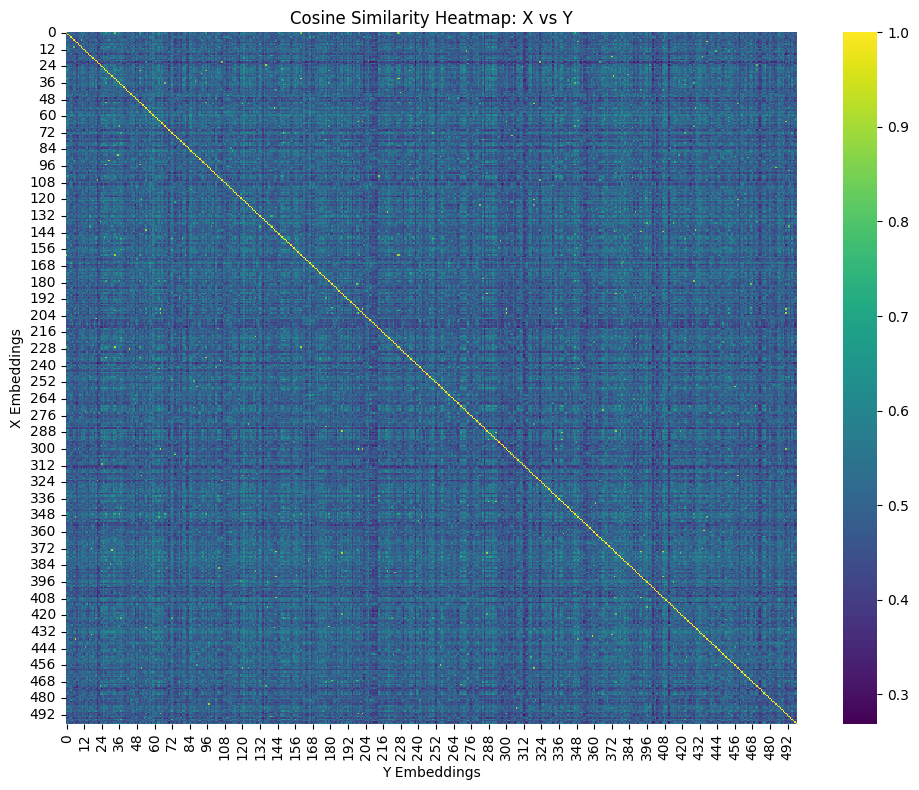

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt



# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings_de, embeddings_fr)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="viridis", annot=False)
plt.title("Cosine Similarity Heatmap: X vs Y")
plt.xlabel("Y Embeddings")
plt.ylabel("X Embeddings")
plt.tight_layout()
plt.show()


In [ ]:
df_de = df_sample[df_sample.languageCode=='de'].reset_index(drop=True)
df_fr = df_sample[df_sample.languageCode=='fr'].reset_index(drop=True)
len(df_de), len(embeddings_de)

(499, 499)

In [ ]:
# sample similar pairs ignoring those on diagonal
similar = [(int(i),int(j)) for i,j in list(zip(*np.where(similarity_matrix > 0.9))) if i != j]

NameError: name 'np' is not defined

In [ ]:
similar

[(6, 437),
 (17, 372),
 (17, 434),
 (29, 92),
 (31, 373),
 (33, 160),
 (33, 227),
 (43, 228),
 (64, 199),
 (64, 300),
 (92, 29),
 (105, 236),
 (143, 392),
 (160, 33),
 (160, 226),
 (188, 287),
 (188, 375),
 (199, 64),
 (199, 202),
 (199, 300),
 (199, 491),
 (202, 199),
 (202, 300),
 (202, 491),
 (226, 160),
 (227, 33),
 (228, 43),
 (236, 105),
 (287, 188),
 (300, 64),
 (300, 199),
 (300, 202),
 (359, 435),
 (372, 17),
 (373, 31),
 (374, 392),
 (374, 407),
 (375, 188),
 (392, 143),
 (392, 374),
 (407, 374),
 (434, 17),
 (435, 359),
 (437, 6),
 (491, 199),
 (491, 202)]

In [ ]:
i,j = similar[0]


In [ ]:
df_de.iloc[i].transcript

'Malzeztrukt von Di-. Wander, Bern Zürich, Mp! om ersten Ranges für uonüaliche Qualität Chemisch-rein, gegen Husten, Hals-, Brust- und Lungenleiden Fr. 1. 39 «^ Eisenhaltig, gegen Schwächezustände, Bleichsucht, Blutarmuth? c „ 1. 40 <» Iodeisenhaltig, bei Skrovhulose und nls Ersatz des Leberthrans „ 1. 49 8 Chininhaltig, bei Nervenleiden, Fieber und als Kräftigungsmittel „ 1. 79 Gegen Würmer, sehr geschützt seines unfehlbaren Effektes wegen „ 1. 40 ^ 3 Gegen Keuchhuste «, ein vielfach erprobtes, fast immer sicheres Mittel „ I. 40 . Z Kaltphosphat, bestes Präparat für schwächliche, strophulose Kinder „ I. 49 » 2 Malz-Gx. tr. mit Diastase und Pepsin zur Beförderung der Verdauung „ 1. 49 Malzzucker und Malzbonbons, sehr geschätzt bei Husten und Verschleimung. ^ Nur diese Malzpraparate erhielten in Bremen 1874 allein eine Medaille » Devot bei. I: Lohr, 3 t. Heutz, Apotheken in Chur; Mutfchler in Samaden und St Moritz; Noisot in Schuls; Taeuler in Davos; Huber in Thusis; R. Heuß in Echiers.

In [ ]:
df_fr.iloc[j].transcript

'DISTRICT DE — Ischy, Jenny, Fiez-Pittet. — Malherbe, Emma, aux Tuileries. — Mégroz, Made¬ leine. — Nicoud, Jenny. — Simon, Anna. — Winkelmann, Julie, aux Tuileries. Tanneurs. — Brecht, Gustave. — Ray, F". Tisserand. — David, Jean. Tonneliers. — Berner, Jean-Antoine. — Cocliand, Ulysse. — Vollimann, Vendelin. Tuilier. — Ischv, Samuel, aux Tuileries. Vins ( marchand de). — Bernard, Augustin, café du Nord. Grandevent. 122 habitants. Aubergiste. — Dannelet, Charles. Cordonnier. — Giroud, David-François. Régente. — Nicolas. Emma. Syndic. — Giroud, Jaques-Louis. Mauhorget. 103 habitants. Café. — Perret. Henri. Epiciers. — Perret, Henri-Louis, fils. — Petitpierre, Louis. Pinte. — Simon, Henri-Louis. Régente\'. — Addor, Elise. Set (débit de). — Petitpierre, Louis. Syndic. — Simon, Julien. Railleuse. — Simon, Emma. Mutrux. 221 habitants. — Dépôt de poste. Aubergiste. — Fardel, Jules-François, à l’Espérance. Charpentier. — Boillet, Louis. Maréchal. — Junod, Jean-François. Régent. — Reymond. Lou

# Query


In this part, we index the embedded vectors with FAISS. And use the vectors database to search for German articles using the French transcripts. This can be easily reversed.

In [ ]:
!pip -qqq install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 38.2 MB/s eta 0:00:00


In [ ]:
# --- VECTOR STORE (FAISS) ---
# save index
import faiss



df_sample = pd.read_json('df_sample-embedded.json')

EMBEDDING = 'transcript_embedding'

print(df_sample.languageCode.value_counts())
query_lang = 'de'
target_lang = 'fr'
df_q = df_sample[(~df_sample[EMBEDDING].isnull()) & (df_sample.languageCode==query_lang)]
df_t = df_sample[(~df_sample[EMBEDDING].isnull()) & (df_sample.languageCode==target_lang)]

embeddings_q = list(df_q[EMBEDDING])

VECTOR_DB_PATH = f"vector_db_{query_lang}.faiss"
embeddings = np.array(list(df_q[EMBEDDING]), dtype="float32")


dim = embeddings.shape[1]
index = faiss.IndexFlatL2(dim)
index.add(embeddings)
faiss.write_index(index, VECTOR_DB_PATH)
print(f"Vector DB saved to {VECTOR_DB_PATH}")


languageCode
de    500
fr    500
Name: count, dtype: int64
Vector DB saved to vector_db_de.faiss


In [ ]:

query = df_t.iloc[0].transcript
print(query)
q_emb = convert_embedding(embed_text(query,'text'))

D, I = index.search(np.array([q_emb], dtype="float32"), k=5)
print("Top 5 most similar articles:")
print(df_q.iloc[I[0]])

NOMS PAR ORDRE ALPHABÉTIQUE 65 Heusy, Jenny, rentière, Maupas, 23. Hierholz, Gustave, maître tapissier, r. (lu Midi, 4, R. C. — (Voir aux annonces.) Hiertzeler, Madeleine, veuve, r. Ecole industrielle, 13. Hignou, Charlotte-Henriette, demoiselle, institutrice, Cité-Derrière, 3. — Pauline, directrice de l’Ouvroir, r. Pé- pinet, 1. — Susanne, épicerie, mercerie, poterie, r. de l’Halle, IG, R. C. — Aloïse. lingère, r. de l’Halle, 1G. — Julie, lingère, r. de l’Halle, 16. Hildebrand, Elise, couturière, r. de la . Caroline, 13. — Madeleine, veuve, garde-malades, rue Caroline, 13. Hinderer, Ernest, pharmacien, square de Georgette. 4, R. C. • Hintermann, Jean-Jacob, tonnelier, rue du Klon, 4.'Hintermeister, Hermann, dépôt de tein¬ ture et dégraissage, r. de Bourg, 27. Hipp, Louis-Georges, maître cordonnier, r. Pépinet, 2, R. C. — Elisabeth, ménagère, Caroline, 6. Hirsbrunner, Gottlieb, lithographe, pl. Grand St-Jean, 4. Hirsehi, Adolphe, bûcheron, r. du Pré, 23. Hirschi-Knuili, Charles, empi. 

# Fin.